In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\work2\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\work2\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\work2\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\work2\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('../data/mouse_viral_study.csv')
df.head()


,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.shape

(400, 3)

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

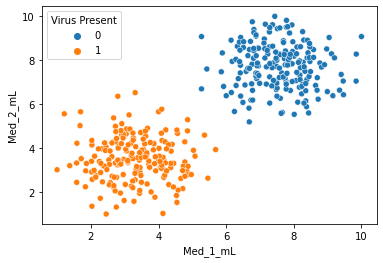

In [6]:
# 绘制两种药物在不同剂量特征对应感染结果的散点图
sns.scatterplot(x='Med_1_mL', y = 'Med_2_mL', hue = 'Virus Present', data=df)

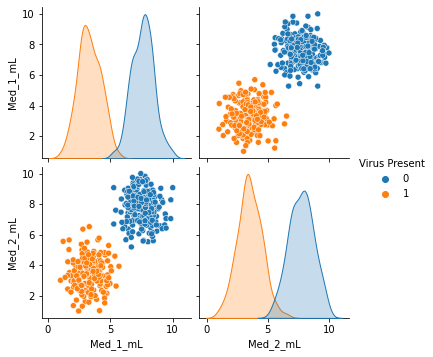

In [7]:
# 绘制特征两两之间的对应关系
sns.pairplot(df, hue='Virus Present')

In [24]:
# SVC: Support Vector Classifier
from sklearn.svm import SVC

# prepare data
y=df['Virus Present']
X = df.drop('Virus Present',axis=1)

### SVC线性核函数，kernel=linear, 参数C

SVC方法参数C代表L2正则化参数，正则化的强度与C的值成**反比**，即C的值越大正则化强度越弱，其必须严格为正。
当减少C值，可以看到模型拟合数据的程度减弱。

In [ ]:
# define model
# model = SVC(kernel='linear', C=0.05)
# model = SVC(kernel='linear', C=10000)

### 多项式核函数 kernel=poly

原理简单来说，就是用单一特征生成多特征来拟合曲线，比如

| X | X^2 | X^3 | y|
|----|----|----|----|
|6|6^2|6^3|0|
|1.1321| 1.1321^2|1.1321^3| 1|

使用多项式内核，并通过**degree=5**设置多项式的最高次数为5，可以看出分割出现了一定的弧度。

In [25]:
#model = SVC(kernel='poly', C=0.05, degree = 5)

### 高斯RBF核函数 kernel=RBF, Radial Basis Function, 径向基函数

引入**gamma**参数来控制钟形函数的形状。
增加gamma值会使钟形曲线变得更窄，因此每个实例影响范围变小，决策边界更不规则。
减小gamma值会使钟形曲线变得更宽，因此每个实例影响范围变大，决策边界更平坦。

In [34]:
model = SVC(kernel='rbf',C=1, gamma=0.01)

In [35]:
model.fit(X,y)

SVC(C=1, gamma=0.01)

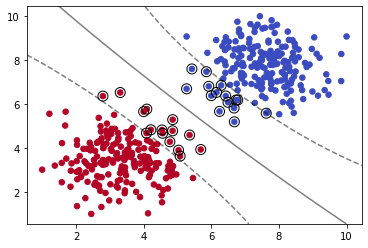

In [36]:

def plot_svm_boundary(model,X,y):
    X = X.values
    y = y.values
    
    # scatter plot
    plt.scatter(X[:,0],X[:,1], c=y, s=30, cmap='coolwarm')
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1],30)
    yy = np.linspace(ylim[0], ylim[1],30)
    YY,XX = np.meshgrid(yy,xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # plot the decision boundary and margins
    ax.contour(XX,YY,Z, colors = 'k', levels=[-1,0,1], alpha=0.5,\
              linestyles = ['--', '-', '--'])
    
    # plot support vector
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s=100,\
              linewidth=1,facecolors='none',edgecolors='k')
    
    plt.show()


In [ ]:
plot_svm_boundary(model,X,y)

### 调参： 网格搜索GridSearch()

通过GridSearch()方法遍历超参数的各种可能性来寻求最优超参数。这时通过算力碾压的方式暴力调参的手段。

In [39]:
from sklearn.model_selection import GridSearchCV

svm=SVC()

param_grid = {'C':[0.01,0.1, 1], 'kernel':['rbf','poly','linear','sigmoid'],'gamma':[0.01,0.1,1]}

grid = GridSearchCV(svm,param_grid)
grid.fit(X,y)
print('grid.best_params_ = ',grid.best_params_,", grid.best_score_ = ", grid.best_score_)

grid.best_params_ =  {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'} , grid.best_score_ =  1.0
